In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [5]:
df= pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print(df.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [6]:
# Optional: Convert Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Features and Target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [7]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#train the model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
#make predictions
y_pred = classifier.predict(X_test)

In [11]:
#evaluate the model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Extract values
TN, FP, FN, TP = cm.ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
 [[61  2]
 [10 27]]
True Positives (TP): 27
False Positives (FP): 2
True Negatives (TN): 61
False Negatives (FN): 10
Accuracy: 0.88
Error Rate: 0.12
Precision: 0.93
Recall: 0.73


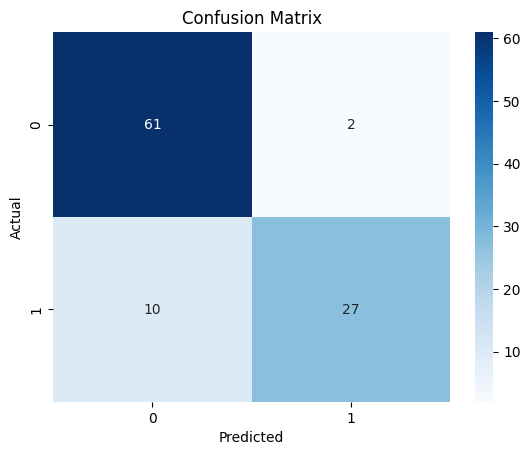

In [12]:
#visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()